In [19]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)
import numpy as np
from sklearn.datasets import load_boston
from tqdm import tqdm_notebook as tqdm

In [20]:
X, y = load_boston(return_X_y = True)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import Lars

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [23]:
mod_and_prop = {
    Lars(): {'normalize': [True, False],'eps': [0.1 ,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
    KNeighborsRegressor(): {'n_neighbors': [7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
    LinearRegression(): {'fit_intercept': [False, True], 'normalize': [False, True]}, 
    RandomForestRegressor(): {'n_estimators':[3, 5, 7, 9, 11, 13, 15, 17], 'max_depth': [5, 7, 9, 11, 13, 15, 17]}}

In [24]:
tmp = {}
best_mod = []
TestModels = pd.DataFrame()
for i in tqdm(mod_and_prop.keys()):
    grid = GridSearchCV(i, mod_and_prop.get(i), cv = 20)
    grid.fit(X, y)
    grid.best_estimator_.fit(X_train, y_train)
    m = str(i)
    tmp['Model'] = m[:m.index('(')]
    tmp['R2_Y'] = r2_score(y_test, grid.best_estimator_.predict(X_test))
    best_mod.append(grid.best_estimator_)
    TestModels = TestModels.append([tmp])
TestModels.set_index('Model', inplace=True)

c:\users\сергей\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\сергей\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\сергей\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\u

In [25]:
#выведем результаты для обычных моеделй, что бы убедиться, что результаты действиетльно улучшаются
mod = LinearRegression()
mod.fit(X_train, y_train)
mod.score(X_test,y_test)

0.6502007820077824

In [26]:
mod = Lars()
mod.fit(X_train, y_train)
mod.score(X_test,y_test)

0.6502007820077819

In [27]:
mod = KNeighborsRegressor()
mod.fit(X_train, y_train)
mod.score(X_test,y_test)

0.5946805562316343

In [28]:
mod = RandomForestRegressor()
mod.fit(X_train, y_train)
mod.score(X_test,y_test)

c:\users\сергей\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8221880497696354

0.6402038349246392 Lars(copy_X=True, eps=1, fit_intercept=True, fit_path=True,
   n_nonzero_coefs=500, normalize=False, positive=False, precompute='auto',
   verbose=False)


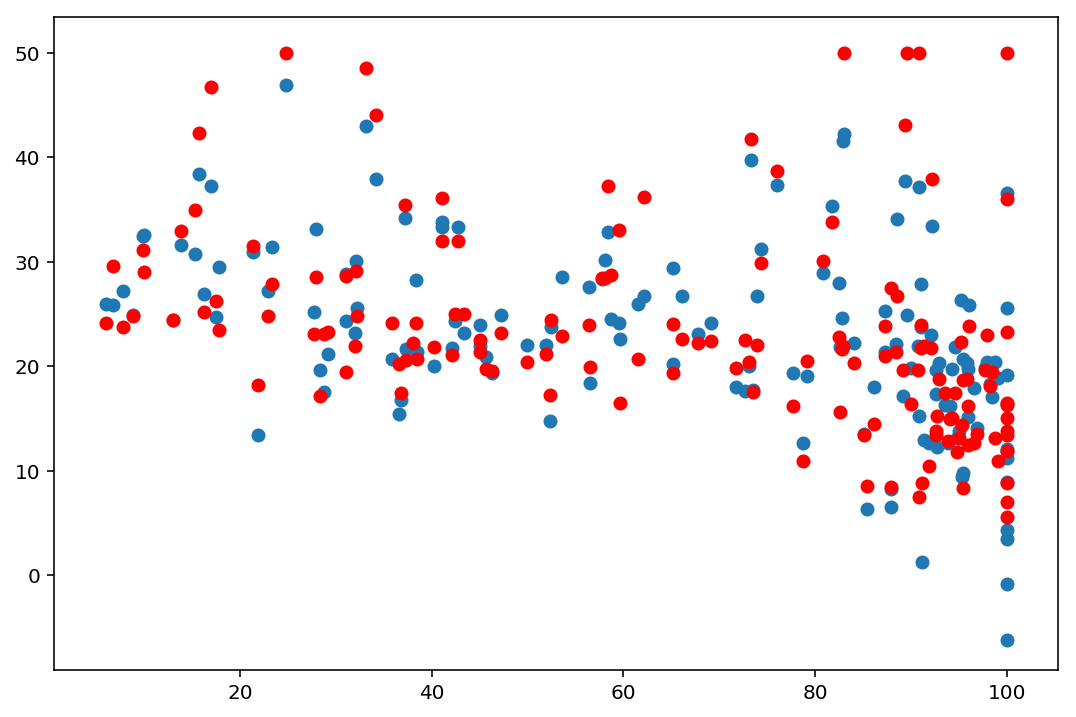

0.3806677497682946 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=27, p=2,
          weights='uniform')


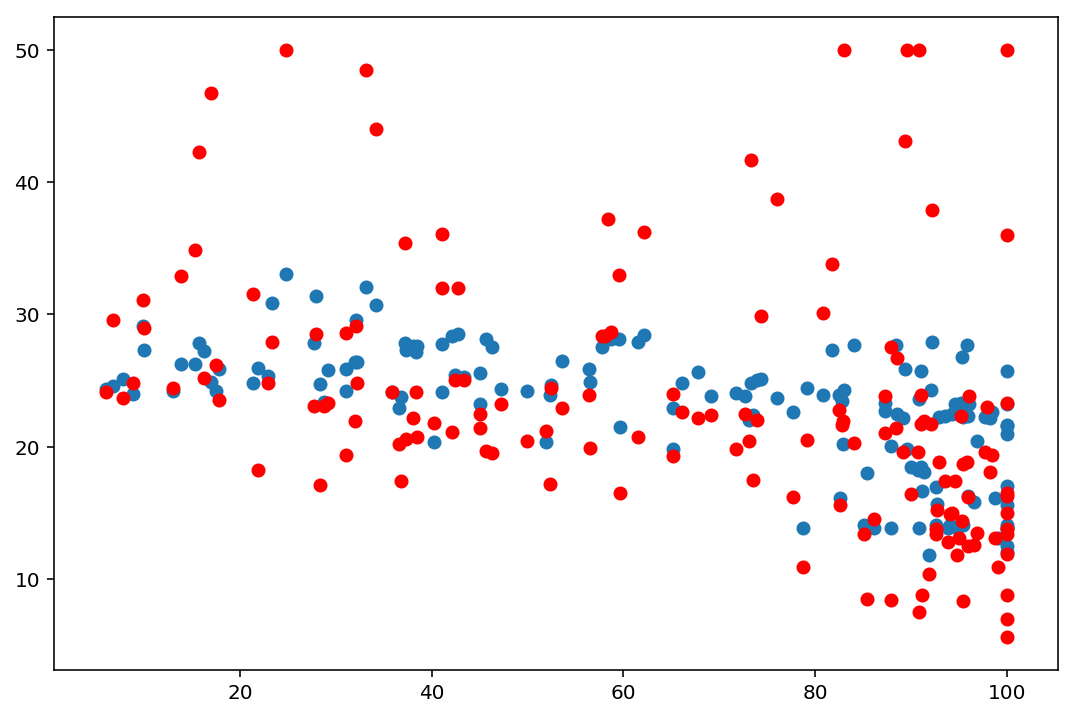

0.6502007820077824 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


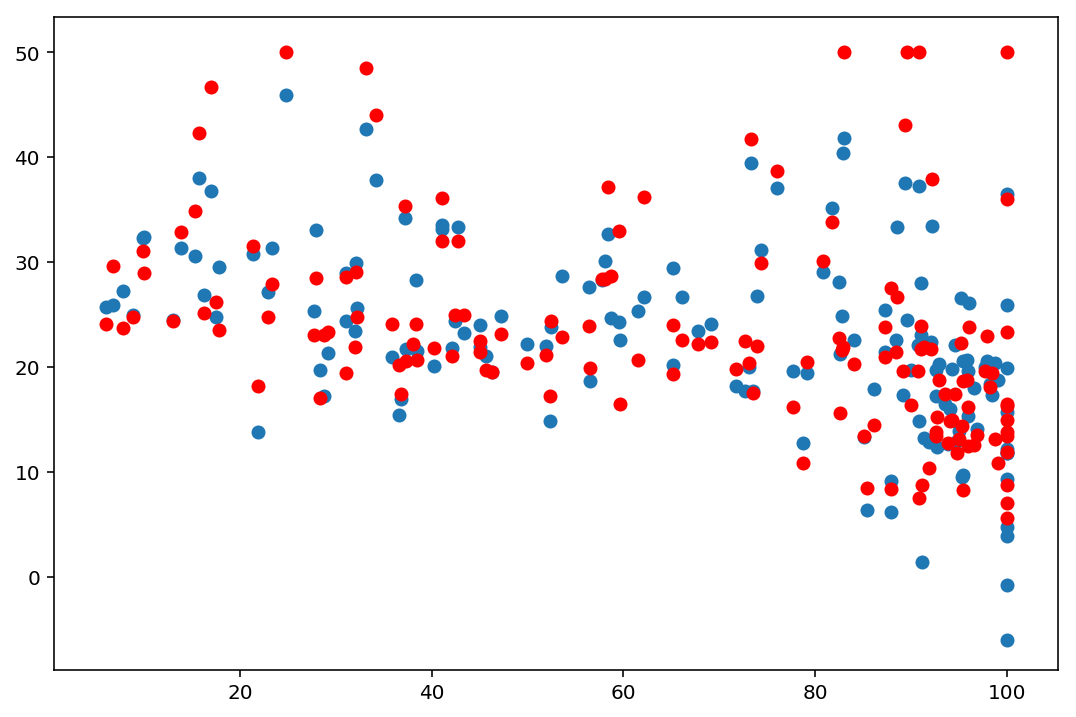

0.8369428558754648 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=11, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


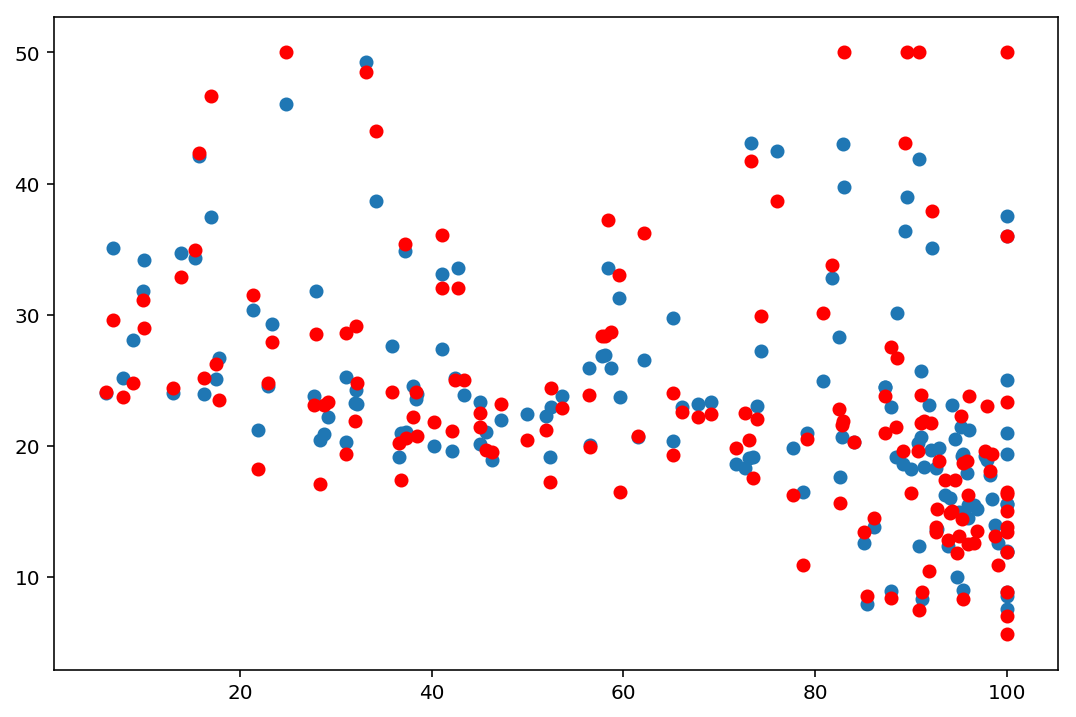

In [29]:
for i in best_mod:
    print(i.score(X_test, y_test), i)
    plt.scatter(pd.DataFrame(X_test)[6],i.predict(X_test))
    plt.scatter(pd.DataFrame(X_test)[6],y_test, color = 'red')
    plt.show()

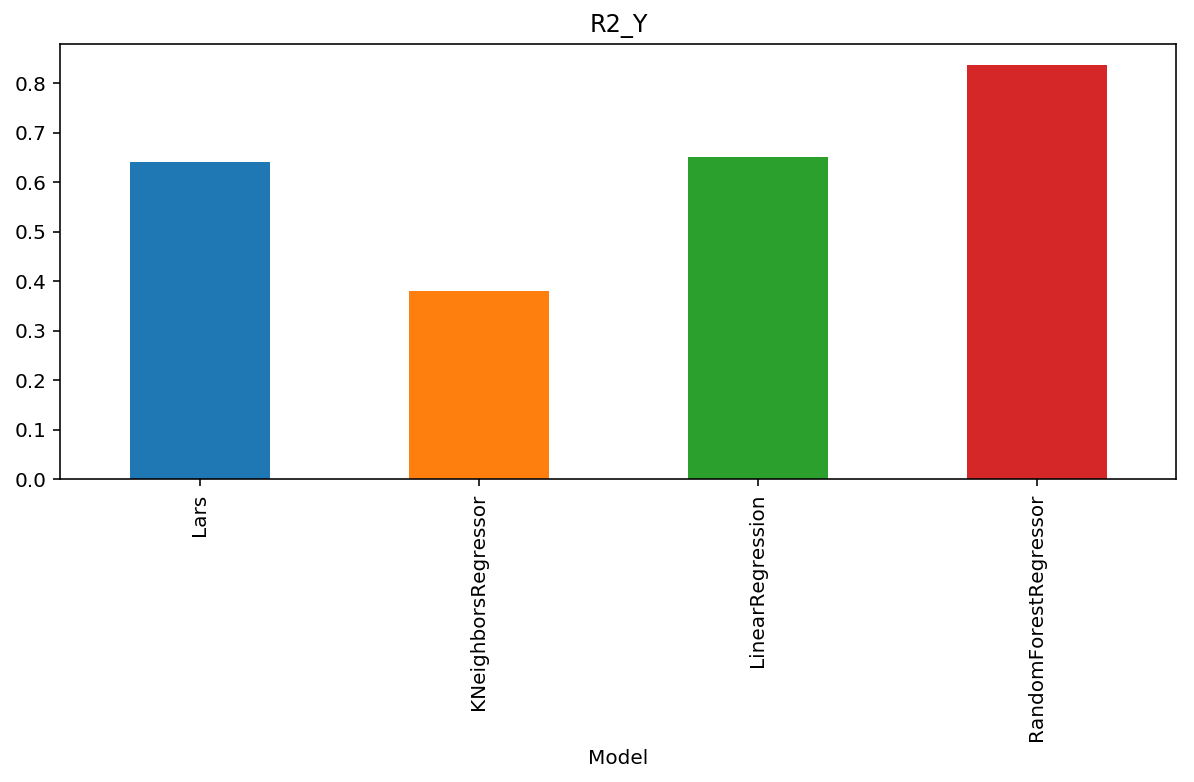

In [31]:
fig, axes = plt.subplots(ncols=1, figsize=(10,4))
TestModels.R2_Y.plot(ax=axes, kind='bar', title='R2_Y')